In [140]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",message="The figure layout has changed to tight")


In [141]:
df = pd.read_csv('Lifestyle_data Final Project.csv')

In [142]:
df.head()

,class_date,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,1-2-2023,2,meditation,102,it,basic,3,it,6-1-2022,tv,2157,1
1,22-5-2023,241,power yoga,111,it,basic,1,it,11-5-2022,pc,6172,3
2,6-8-2022,173,power yoga,117,it,advanced,3,it,12-12-2021,pc,6255,2
3,8-8-2023,217,hatha,100,en,intermediate,3,uk,7-2-2022,tv,3317,4
4,11-3-2022,230,power yoga,113,fr,basic,2,fr,9-1-2020,pc,6159,1


In [143]:
df.shape

(999, 12)

In [144]:
df[df['class_id'] == 2157]

,class_date,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,1-2-2023,2,meditation,102,it,basic,3,it,6-1-2022,tv,2157,1
928,19-8-2023,33,meditation,111,en,basic,2,uk,2-7-2022,pc,2157,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class_date         999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   coach_id           999 non-null    int64 
 4   language           999 non-null    object
 5   level              999 non-null    object
 6   challenge_id       999 non-null    int64 
 7   country            999 non-null    object
 8   subscription_date  999 non-null    object
 9   platform           999 non-null    object
 10  class_id           999 non-null    int64 
 11  stars              999 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 93.8+ KB


In [146]:
df.describe().round(3)

,user_uuid,coach_id,challenge_id,class_id,stars
count,999.000,999.000,999.000,999.000,999.000
mean,120.665,111.196,1.505,4171.795,3.018
std,71.169,6.553,1.121,1878.218,1.424
min,1.000,100.000,0.000,211.000,1.000
25%,58.500,106.000,1.000,3149.000,2.000
50%,118.000,111.000,1.000,4220.000,3.000
75%,182.000,117.000,3.000,6215.000,4.000
max,245.000,122.000,3.000,6399.000,5.000


In [147]:
df.nunique()

class_date           554
user_uuid            240
category               4
coach_id              23
language               3
level                  3
challenge_id           4
country                3
subscription_date    219
platform               3
class_id             636
stars                  5
dtype: int64

- La colonna 'class_date'  mostra una significativa varietà di date, indicando che il dataset copre un ampio arco temporale.
- Ci sono 240 utenti unici, ma considerando che ci sono 999 record, molti utenti hanno partecipato a più di una classe.
- Con 4 categorie di classi, 23 coach diversi e 636 ID di classe unici, il dataset riflette una vasta gamma di offerte di classi.
- La presenza di 3 lingue e 3 livelli di difficoltà suggerisce una certa varietà nell'offerta delle classi per coprire diverse esigenze.
- La presenza di utenti da 3 paesi diversi indica un pubblico internazionale.
- L'esistenza di 3 diverse piattaforme mostra i modi in cui gli utenti partecipano alle classi.
- La varietà nelle valutazioni (5 valori unici) offre la possibilità di capire come vengono percepite le classi dagli utenti.



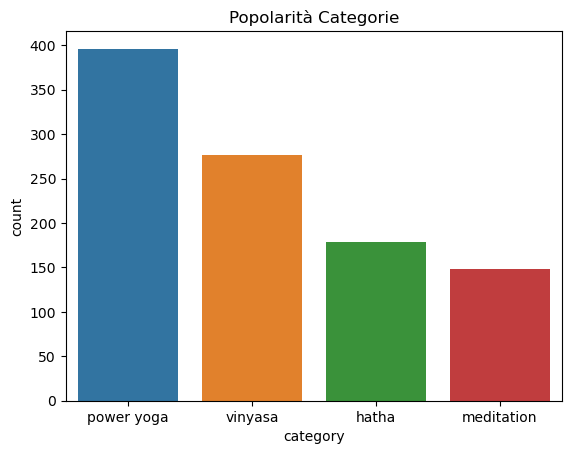

In [148]:
order_cat = df['category'].value_counts().index

sns.countplot(data=df,x='category', order = order_cat)
plt.title('Popolarità Categorie')
plt.show()

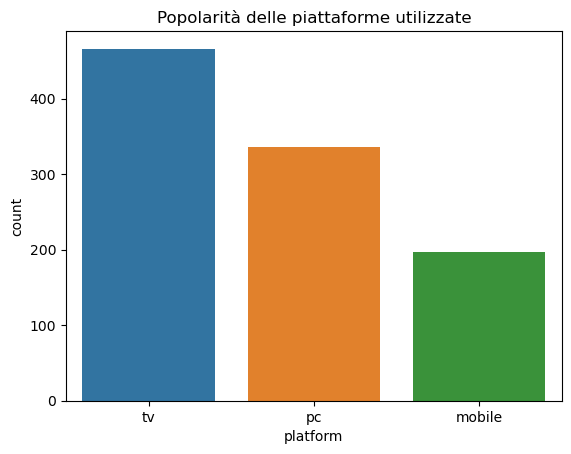

In [149]:
order_plat = df['platform'].value_counts().index

sns.countplot(data=df, x= 'platform', order= order_plat)
plt.title('Popolarità delle piattaforme utilizzate')
plt.show()

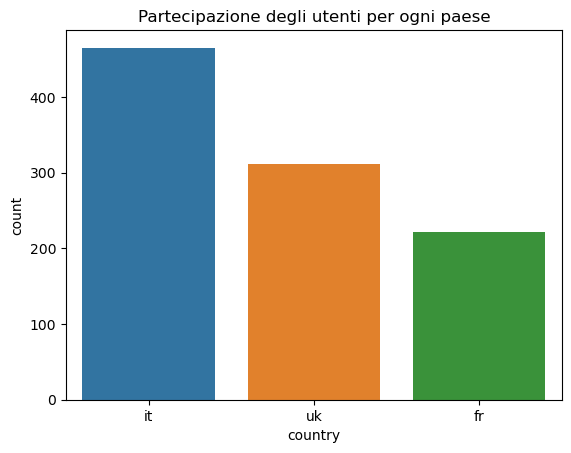

In [150]:
order_country = df['country'].value_counts().index

sns.countplot(data=df, x= 'country', order = order_country)
plt.title('Partecipazione degli utenti per ogni paese')
plt.show()

- Adesso parto con l'analisi che voglio fare, conta solo da df.describe()

prepariamo la time series

In [151]:
df['class_date'] = pd.to_datetime(df['class_date'], format= '%d-%m-%Y')

df_2021 = df[df['class_date'].dt.year == 2021].copy()

In [152]:
timeser_2021 =(df_2021).copy()

timeser_2021.set_index('class_date',inplace=True)

In [153]:
mediaDfQuart_2021 = timeser_2021.resample('M').count()

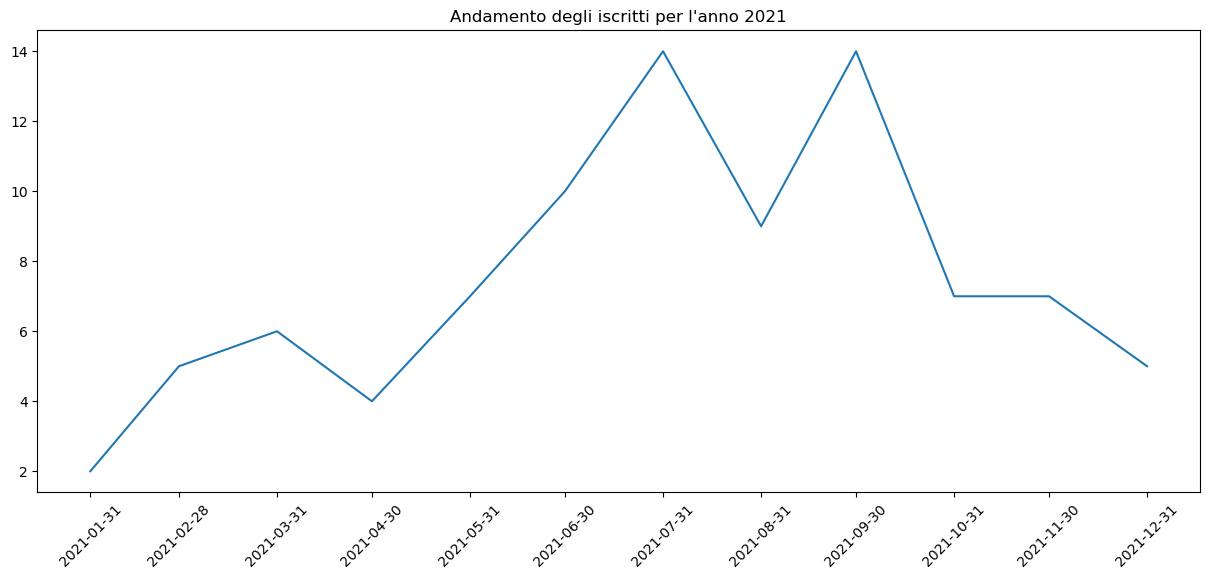

In [154]:
#Serie Temporale sugli abbonati
plt.figure(figsize=(15,6))
plt.plot(mediaDfQuart_2021.index,mediaDfQuart_2021['subscription_date'])
plt.title("Andamento degli iscritti per l'anno 2021")
plt.xticks(mediaDfQuart_2021.index,rotation = 45)
plt.show()

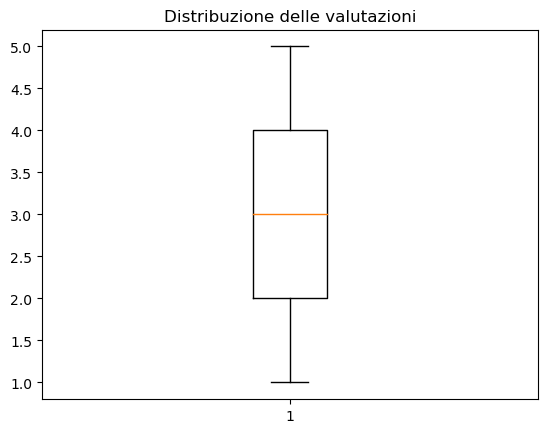

In [155]:

plt.boxplot(data=df_2021, x= 'stars')
plt.title('Distribuzione delle valutazioni')
plt.show()

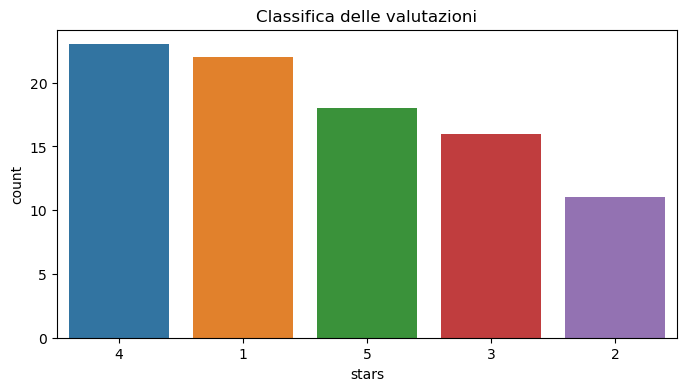

In [156]:
stars_order = df_2021['stars'].value_counts().index

plt.figure(figsize=(8,4))
sns.countplot(data=df_2021, x= 'stars',order= stars_order)
plt.title('Classifica delle valutazioni')
plt.show()

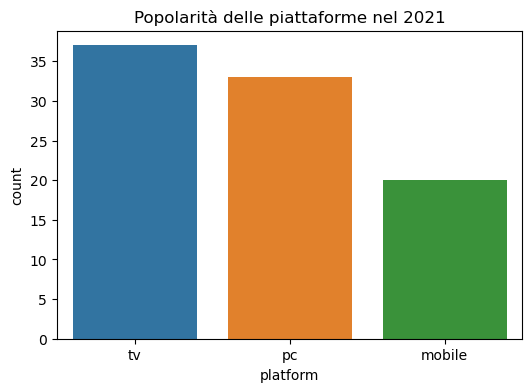

In [157]:
#Classifica sull'uso delle piattaforme
plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='platform', order= order_plat)
plt.title('Popolarità delle piattaforme nel 2021')
plt.show()

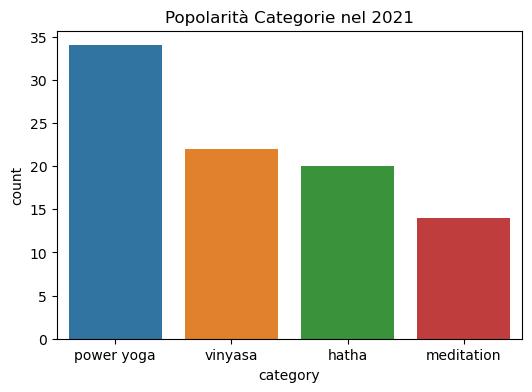

In [158]:
#Classifca categorie 

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='category', order= order_cat)
plt.title('Popolarità Categorie nel 2021')
plt.show()

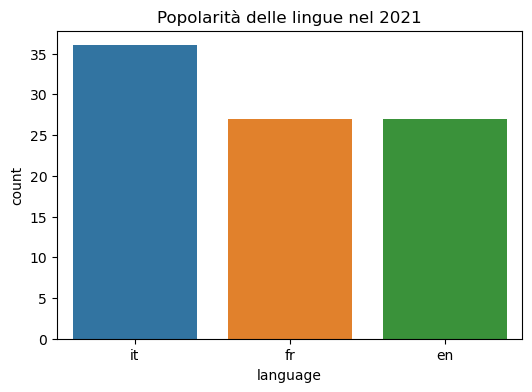

In [159]:
lang_order = df_2021['language'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x = 'language',order = lang_order)
plt.title('Popolarità delle lingue nel 2021')
plt.show()

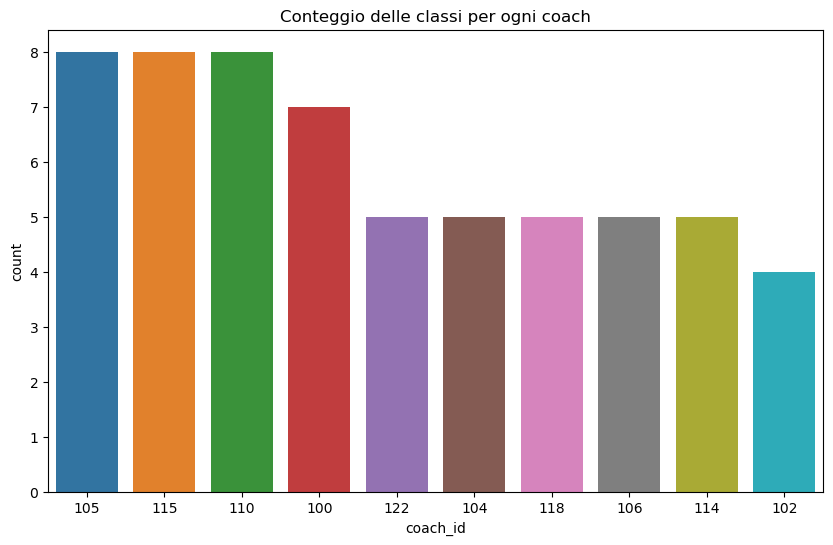

In [160]:
order_coach = df_2021['coach_id'].value_counts()

top_10_coach = order_coach.head(10).index

plt.figure(figsize=(10,6))
sns.countplot(data=df_2021,x='coach_id',order=top_10_coach)
plt.title('Conteggio delle classi per ogni coach')
plt.show()

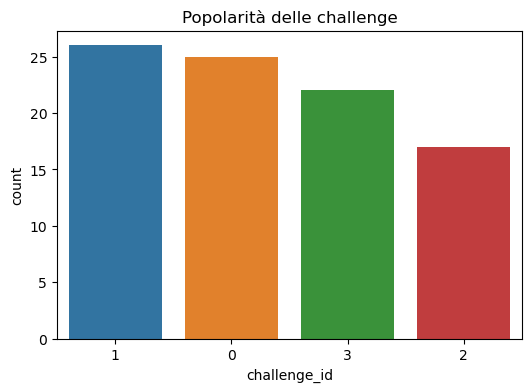

In [161]:
order_chall = df_2021['challenge_id'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021,x='challenge_id', order = order_chall)
plt.title('Popolarità delle challenge')
plt.show()

In [162]:
usr_count = df_2021['user_uuid'].nunique()
coac_count= df_2021['coach_id'].nunique()
clas_count= df_2021['class_id'].nunique()
Class_date_uniq = df_2021['class_date'].nunique()
class_date_count = df_2021['class_date'].count()
avg_stars_score = df_2021['stars'].mean().__round__(2)

stats = {
    "N. Utenti nel 2021": usr_count,
    "N. Coach nel 2021": coac_count,
    'N. di classi nel 2021': clas_count,
    "N. giorni con accessi all'app": Class_date_uniq,
    "N. di classi fatte nel 2021": class_date_count,
    "Average Stars score" : avg_stars_score
}

# Ciclo for per stampare le informazioni
for descrizione, valore in stats.items():
    print(f"{descrizione}: {valore}")

N. Utenti nel 2021: 55
N. Coach nel 2021: 22
N. di classi nel 2021: 86
N. giorni con accessi all'app: 77
N. di classi fatte nel 2021: 90
Average Stars score: 3.04


In [163]:
df_2021['month'] = df_2021['class_date'].dt.month_name()

top_3_month = df_2021['month'].value_counts().head(3)


result_t = top_3_month.reset_index()

result_t.columns = ['month','N. of class made']

print('ranking')
print(result_t.to_string(index=False))

ranking
    month  N. of class made
     July                14
September                14
     June                10


In [164]:
result_country = df_2021['country'].value_counts().reset_index()

result_country.columns = ['country','N. Utenti per country']

print('Country')
print(result_country.to_string(index=False))

Country
country  N. Utenti per country
     it                     36
     fr                     27
     uk                     27


In [165]:
top_class = df.groupby(['category','class_id'])['class_date'].count().reset_index()

top_class.columns = ['category', 'ID class', 'number of classes']

top_class = top_class.sort_values(by='number of classes',ascending=False).head(5)

print('ranking')
print(top_class.to_string(index=False))

ranking
  category  ID class  number of classes
power yoga      6215                  6
power yoga      6283                  6
power yoga      6263                  5
     hatha      3251                  5
power yoga      6237                  5


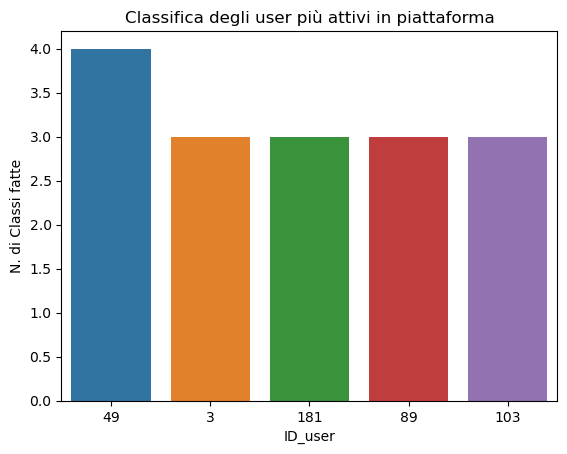

In [166]:
top_user = df_2021.groupby('user_uuid')['class_date'].count().reset_index()
top_user.columns = ['ID_user','N. di Classi fatte']

top_user = top_user.sort_values(by='N. di Classi fatte',ascending=False).head(5)

sns.barplot(data=top_user,x='ID_user',y='N. di Classi fatte', order=top_user['ID_user'])
plt.title('Classifica degli user più attivi in piattaforma')
plt.show()

In [167]:
df_2021.groupby('category')['stars'].mean().__round__(2).sort_values(ascending=False)

category
meditation    3.57
power yoga    3.12
vinyasa       3.00
hatha         2.60
Name: stars, dtype: float64

In [168]:
df_2021.groupby('category')['class_id'].nunique().sort_values(ascending=False)

category
power yoga    31
vinyasa       21
hatha         20
meditation    14
Name: class_id, dtype: int64

In [169]:
df.groupby('category')['platform'].value_counts().sort_index(ascending=False)

category    platform
vinyasa     tv          135
            pc           86
            mobile       55
power yoga  tv          193
            pc          132
            mobile       71
meditation  tv           59
            pc           60
            mobile       29
hatha       tv           79
            pc           58
            mobile       42
Name: count, dtype: int64

In [170]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 5 to 995
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   class_date         90 non-null     datetime64[ns]
 1   user_uuid          90 non-null     int64         
 2   category           90 non-null     object        
 3   coach_id           90 non-null     int64         
 4   language           90 non-null     object        
 5   level              90 non-null     object        
 6   challenge_id       90 non-null     int64         
 7   country            90 non-null     object        
 8   subscription_date  90 non-null     object        
 9   platform           90 non-null     object        
 10  class_id           90 non-null     int64         
 11  stars              90 non-null     int64         
 12  month              90 non-null     object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 9.8+ KB


In [171]:
df.head()

,class_date,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,2023-02-01,2,meditation,102,it,basic,3,it,6-1-2022,tv,2157,1
1,2023-05-22,241,power yoga,111,it,basic,1,it,11-5-2022,pc,6172,3
2,2022-08-06,173,power yoga,117,it,advanced,3,it,12-12-2021,pc,6255,2
3,2023-08-08,217,hatha,100,en,intermediate,3,uk,7-2-2022,tv,3317,4
4,2022-03-11,230,power yoga,113,fr,basic,2,fr,9-1-2020,pc,6159,1


In [172]:
df_2021.groupby('level')['challenge_id'].count()

level
advanced        35
basic           35
intermediate    20
Name: challenge_id, dtype: int64

In [176]:
df_2021.groupby('user_uuid')['category'].value_counts()


user_uuid  category  
3          hatha         1
           meditation    1
           power yoga    1
11         meditation    2
           power yoga    1
16         vinyasa       1
19         power yoga    1
           hatha         1
24         power yoga    1
           hatha         1
44         hatha         1
49         power yoga    2
           hatha         1
           meditation    1
53         meditation    1
           hatha         1
57         power yoga    1
60         power yoga    1
61         vinyasa       1
63         power yoga    1
65         power yoga    2
           hatha         1
66         vinyasa       1
67         power yoga    1
           vinyasa       1
69         vinyasa       1
73         hatha         1
76         vinyasa       1
77         power yoga    1
79         vinyasa       2
           meditation    1
84         meditation    1
85         vinyasa       1
           power yoga    1
89         vinyasa       1
           meditation    1
      